<h1>Handwritten digits classification using neural network</h1>

In [93]:
import tensorflow as tf
from tensorflow import keras
!pip install keras-tuner --upgrade
from kerastuner import HyperParameters
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from keras.preprocessing.image import ImageDataGenerator

In [94]:
(X_train, y_train) , (X_test, y_test) = keras.datasets.mnist.load_data()

In [95]:
len(X_train)

60000

In [96]:
len(X_test)

10000

In [97]:
X_train

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [98]:
X_train[0].shape

(28, 28)

In [99]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  30,  36,  94, 154, 170,
        253, 253, 253, 253, 253, 225, 172, 253, 242, 195,  64,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,  49, 238, 253, 253, 253, 253,
        253, 253, 253, 253, 251,  93,  82,  82,  56,  39,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,  18, 219, 253, 253, 253, 253,
        253, 198, 182, 247, 241,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  80, 156, 107, 253, 253,
        205,  11,   0,  43, 154,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,  14,   1, 154, 253,
         90,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 139, 253,
        190,   2,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  11, 190,
        253,  70,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  35,
        241, 225, 160, 108,   1,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         81, 240, 253, 253, 119,  25,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,  45, 186, 253, 253, 150,  27,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,  16,  93, 252, 253, 187,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0, 249, 253, 249,  64,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,  46, 130, 183, 253, 253, 207,   2,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  39,
        148, 229, 253, 253, 253, 250, 182,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  24, 114, 221,
        253, 253, 253, 253, 201,  78,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  23,  66, 213, 253, 253,
        253, 253, 198,  81,   2,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,  18, 171, 219, 253, 253, 253, 253,
        195,  80,   9,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,  55, 172, 226, 253, 253, 253, 253, 244, 133,
         11,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0, 136, 253, 25

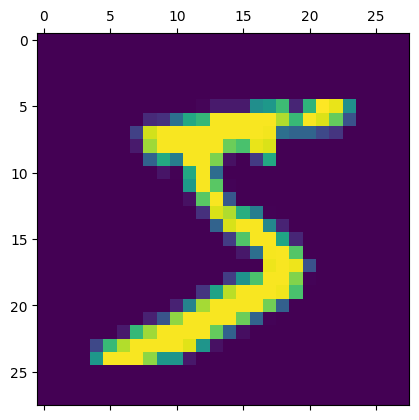

In [100]:
plt.matshow(X_train[0])

In [101]:
y_train[0]

5

In [102]:
y_train[:5]

array([5, 0, 4, 1, 9], dtype=uint8)

In [103]:
X_train = X_train/255
X_test = X_test/255

In [104]:
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

<h2>Neural networks with no hidden layers</h2>

In [105]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape = (28, 28)),
    keras.layers.Dense(10, input_shape=(784,), activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4696 - accuracy: 0.8780
Epoch 2/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3037 - accuracy: 0.9146
Epoch 3/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2837 - accuracy: 0.9203
Epoch 4/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2730 - accuracy: 0.9244
Epoch 5/5
1875/1875 [==============================] - 10s 6ms/step - loss: 0.2670 - accuracy: 0.9258


In [106]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.2663 - accuracy: 0.9266


[0.26628658175468445, 0.9265999794006348]

In [107]:
y_predicted = model.predict(X_test)
y_predicted[0]

313/313 [==============================] - 1s 2ms/step


array([1.4782047e-02, 3.8549038e-07, 5.2739687e-02, 9.5063555e-01,
       3.1008627e-03, 1.0544761e-01, 1.7758576e-06, 9.9979800e-01,
       8.7297067e-02, 6.6529673e-01], dtype=float32)

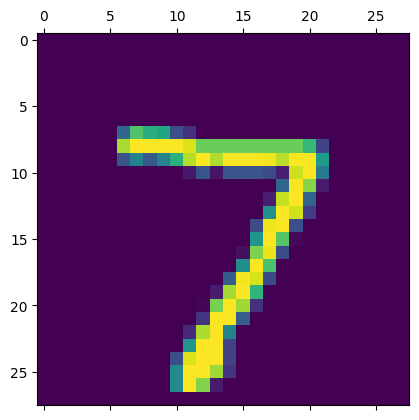

In [108]:
plt.matshow(X_test[0])

In [109]:
np.argmax(y_predicted[0])

7

In [110]:
y_predicted_labels = [np.argmax(i) for i in y_predicted]

In [111]:
cm = tf.math.confusion_matrix(labels = y_test, predictions = y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 958,    0,    2,    2,    0,    6,    8,    2,    1,    1],
       [   0, 1114,    3,    2,    0,    1,    4,    2,    9,    0],
       [   5,    7,  933,   13,    8,    4,   12,    9,   36,    5],
       [   4,    0,   23,  911,    2,   25,    3,   10,   21,   11],
       [   1,    1,    4,    1,  910,    0,   11,    3,    8,   43],
       [   7,    2,    3,   28,   11,  777,   19,    5,   31,    9],
       [   8,    3,    7,    1,    7,    8,  920,    2,    2,    0],
       [   1,    5,   23,    7,    9,    0,    0,  938,    2,   43],
       [   6,    9,    7,   17,    9,   26,    9,   11,  871,    9],
       [   9,    6,    1,    8,   25,    5,    0,   14,    7,  934]],
      dtype=int32)>

Text(95.72222222222221, 0.5, 'Truth')

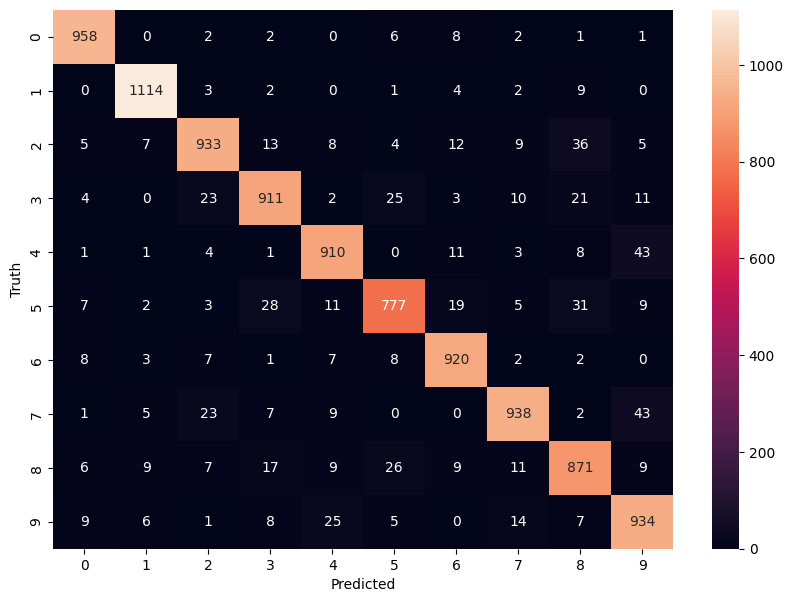

In [112]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

<h1>Using hidden layers</h1>

In [113]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape = (28, 28)),
    keras.layers.Dense(200, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(optimizer='SGD',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=15)

Epoch 1/15
1875/1875 [==============================] - 12s 6ms/step - loss: 0.6487 - accuracy: 0.8361
Epoch 2/15
1875/1875 [==============================] - 16s 8ms/step - loss: 0.3298 - accuracy: 0.9088
Epoch 3/15
1875/1875 [==============================] - 15s 8ms/step - loss: 0.2796 - accuracy: 0.9216
Epoch 4/15
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2490 - accuracy: 0.9305
Epoch 5/15
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2265 - accuracy: 0.9377
Epoch 6/15
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2084 - accuracy: 0.9419
Epoch 7/15
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1930 - accuracy: 0.9464
Epoch 8/15
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1797 - accuracy: 0.9503
Epoch 9/15
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1685 - accuracy: 0.9527
Epoch 10/15
1875/1875 [==============================] - 7s 4ms/step - loss: 0.

In [114]:
model.evaluate(X_test,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.1260 - accuracy: 0.9625


[0.12603263556957245, 0.9624999761581421]

313/313 [==============================] - 1s 2ms/step


Text(95.72222222222221, 0.5, 'Truth')

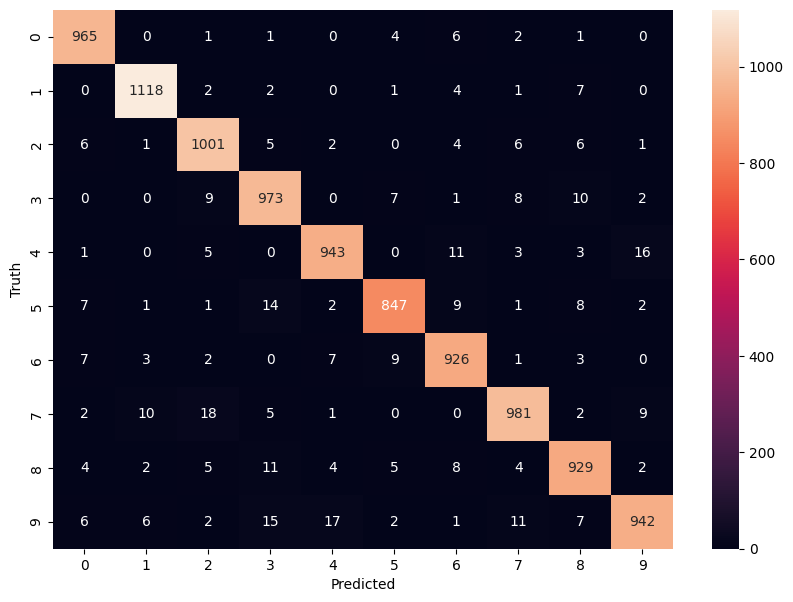

In [115]:
y_predicted = model.predict(X_test)
y_predicted_labels = [np.argmax(i) for i in y_predicted]
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

# Image Augmentation

In [116]:
# CREATE MORE IMAGES VIA DATA AUGMENTATION
datagen = ImageDataGenerator(
        rotation_range=10,
        zoom_range = 0.10,
        width_shift_range=0.1,
        height_shift_range=0.1)

In [117]:
X_train = np.expand_dims(X_train, axis=-1) #(num_samples, height, width) ----> (num_samples, height, width, 1)

In [144]:
# Choose a single image for visualization
image_index = 7
sample_image = X_train[image_index]

In [145]:
sample_image.shape

(28, 28, 1)

In [146]:
# Expand dimensions to fit into the generator
sample_image = sample_image.reshape((1,) + sample_image.shape)

In [147]:
sample_image.shape

(1, 28, 28, 1)

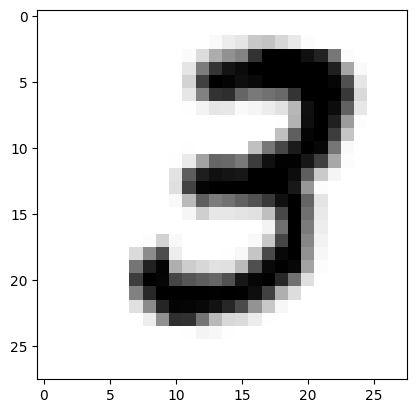

In [148]:
augmented_image = datagen.flow(sample_image, batch_size=1)
plt.imshow(augmented_image[0].reshape((28, 28)), cmap=plt.cm.binary)

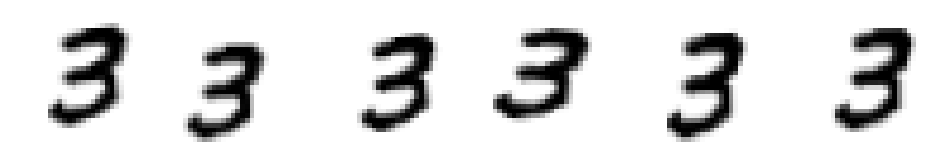

In [149]:
# Preview augmented versions of the same image
plt.figure(figsize=(12, 8))
for i in range(6):  # Generate 6 augmented versions

    augmented_image = datagen.flow(sample_image, batch_size=1).next()

    plt.subplot(1, 6, i + 1)
    plt.imshow(augmented_image[0].reshape((28, 28)), cmap=plt.cm.binary)
    plt.axis('off')
plt.show()

In [150]:
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)

datagen.fit(X_train)

In [151]:
# **Hyperparameter Tuning**
from kerastuner import Hyperband

def model_builder(hp):
    model = keras.Sequential()
    model.add(keras.layers.Dense(units=hp.Int('units', min_value=32, max_value=512, step=32), activation='relu'))
    model.add(keras.layers.Dense(10, activation='sigmoid'))
    model.compile(optimizer=hp.Choice('optimizer', values=['adam', 'sgd']),
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return model

tuner = Hyperband(model_builder,
                     objective='val_accuracy',
                     max_epochs=10)

Reloading Tuner from ./untitled_project/tuner0.json


In [154]:

tuner.search(datagen.flow(X_train, y_train, batch_size=32), epochs=5, validation_data=(X_val, y_val))


In [159]:
print("X_test shape:", X_test.shape)

X_test shape: (10000, 784)


In [161]:
best_model = tuner.get_best_models(num_models=1)[0]

313/313 [==============================] - 1s 2ms/step


Text(95.72222222222221, 0.5, 'Truth')

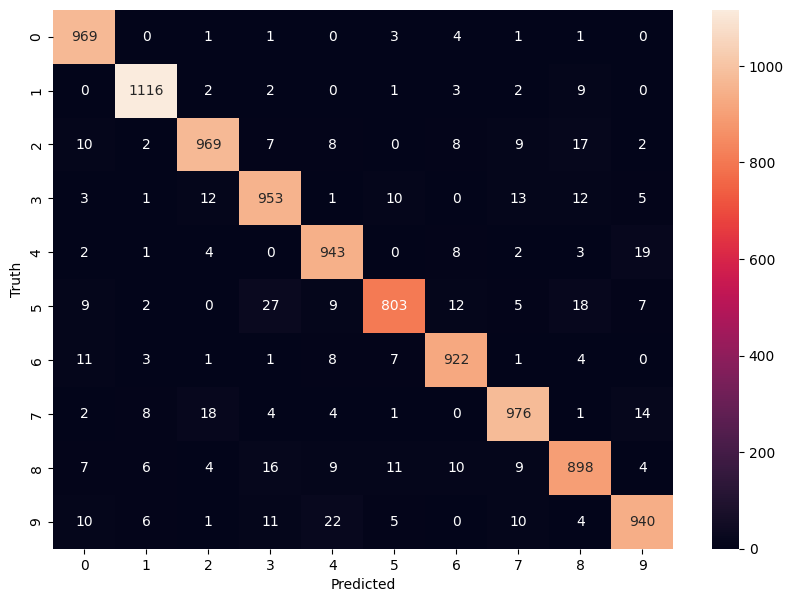

In [163]:
best_model.evaluate(X_test,y_test)

y_predicted = best_model.predict(X_test)
y_predicted_labels = [np.argmax(i) for i in y_predicted]
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')